<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Automobile_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset_path = '/content/drive/MyDrive/MS/4th Sem/DATA 606 Capstone/Dataset/Merged Data'

In [18]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Automobile.csv")

In [19]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28848 entries, 0 to 28847
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                28848 non-null  object 
 1   Symbol              28848 non-null  object 
 2   Series              28848 non-null  object 
 3   Prev Close          28848 non-null  float64
 4   Open                28848 non-null  float64
 5   High                28848 non-null  float64
 6   Low                 28848 non-null  float64
 7   Last                28848 non-null  float64
 8   Close               28848 non-null  float64
 9   VWAP                28848 non-null  float64
 10  Volume              28848 non-null  int64  
 11  Turnover            28848 non-null  float64
 12  Trades              14736 non-null  float64
 13  Deliverable Volume  26811 non-null  float64
 14  %Deliverble         26811 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 3.3

In [20]:
# Summary statistics of the dataset
print(sector_data.describe())

         Prev Close          Open          High           Low          Last  \
count  28848.000000  28848.000000  28848.000000  28848.000000  28848.000000   
mean    2437.547348   2440.908397   2473.993093   2404.229392   2437.479004   
std     4864.825506   4873.437173   4932.603403   4802.757388   4863.387995   
min       17.700000     17.050000     17.750000     15.000000     17.700000   
25%      393.450000    394.800000    402.825000    385.650000    393.537500   
50%      835.750000    837.000000    850.825000    820.025000    835.800000   
75%     2190.325000   2193.600000   2222.525000   2156.012500   2190.925000   
max    32861.950000  33399.950000  33480.000000  32468.100000  32849.000000   

              Close          VWAP        Volume      Turnover        Trades  \
count  28848.000000  28848.000000  2.884800e+04  2.884800e+04  1.473600e+04   
mean    2437.981588   2439.157630  2.543878e+06  1.475192e+14  5.409280e+04   
std     4864.839049   4866.558147  1.016441e+07  2.

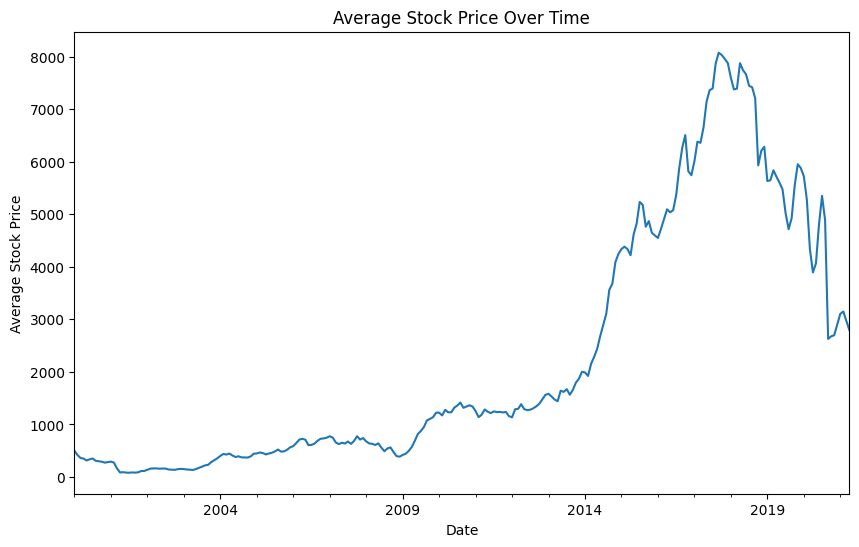

In [21]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

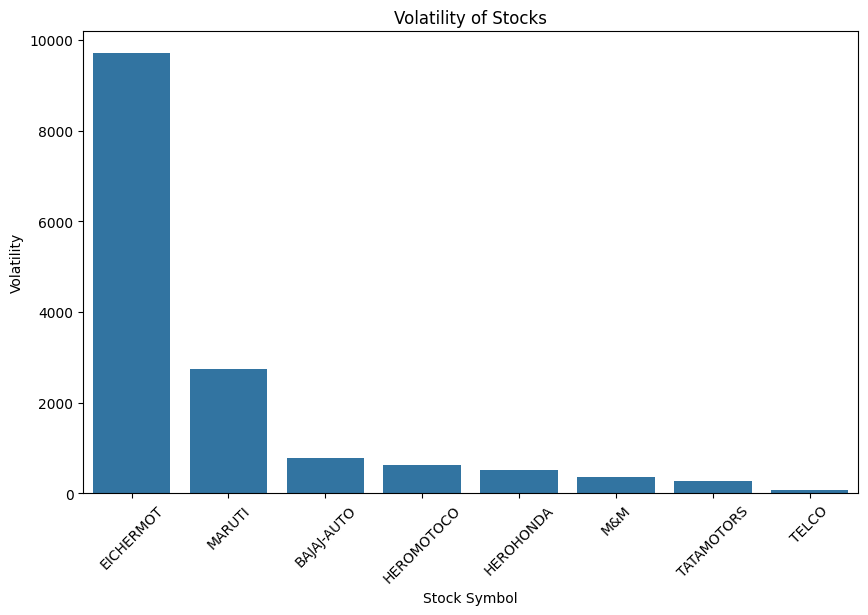

In [22]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

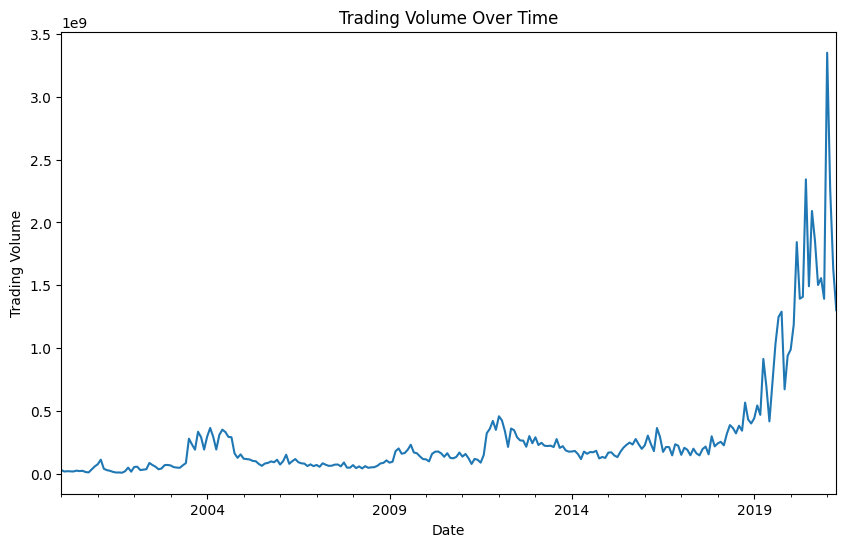

In [23]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


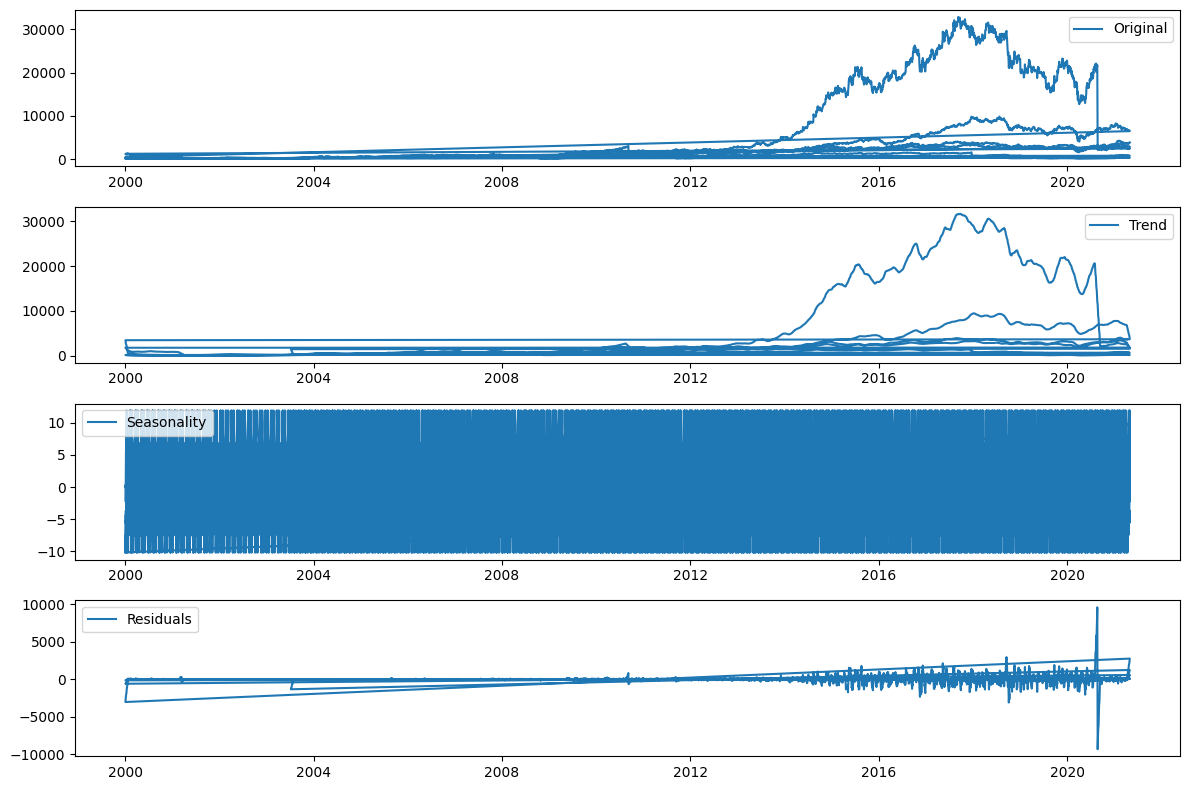

In [24]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

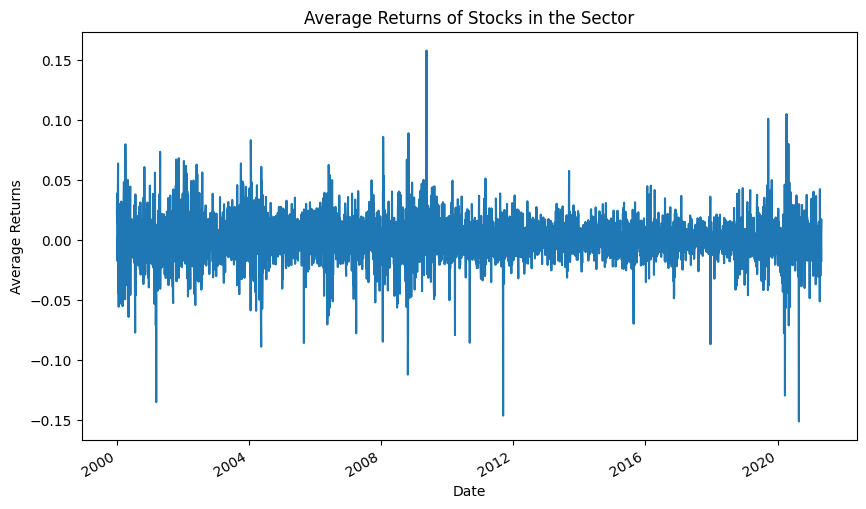

In [25]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()